<a href="https://colab.research.google.com/github/shawonsaha15/MachineLearningProjects/blob/main/Schizophrenia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/schizophrenia_dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Patient_ID              10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education_Level         10000 non-null  int64
 4   Marital_Status          10000 non-null  int64
 5   Occupation              10000 non-null  int64
 6   Income_Level            10000 non-null  int64
 7   Living_Area             10000 non-null  int64
 8   Diagnosis               10000 non-null  int64
 9   Disease_Duration        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_History          10000 non-null  int64
 12  Substance_use           10000 non-null  int64
 13  Suicide_Attempt         10000 non-null  int64
 14  Positive_Symptom_Score  10000 non-null  int64
 15  Negative_Symptom_Sco

In [24]:
df.drop('Patient_ID', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     10000 non-null  int64
 1   Gender                  10000 non-null  int64
 2   Education_Level         10000 non-null  int64
 3   Marital_Status          10000 non-null  int64
 4   Occupation              10000 non-null  int64
 5   Income_Level            10000 non-null  int64
 6   Living_Area             10000 non-null  int64
 7   Diagnosis               10000 non-null  int64
 8   Disease_Duration        10000 non-null  int64
 9   Hospitalizations        10000 non-null  int64
 10  Family_History          10000 non-null  int64
 11  Substance_use           10000 non-null  int64
 12  Suicide_Attempt         10000 non-null  int64
 13  Positive_Symptom_Score  10000 non-null  int64
 14  Negative_Symptom_Score  10000 non-null  int64
 15  GAF_Score           

In [25]:
# Check duplicates
print("\nCount of duplicate rows:")
print(df.duplicated().sum())

# Chck Null values
print("\nNull values in each column:")
print(df.isnull().sum())


Count of duplicate rows:
0

Null values in each column:
Age                       0
Gender                    0
Education_Level           0
Marital_Status            0
Occupation                0
Income_Level              0
Living_Area               0
Diagnosis                 0
Disease_Duration          0
Hospitalizations          0
Family_History            0
Substance_use             0
Suicide_Attempt           0
Positive_Symptom_Score    0
Negative_Symptom_Score    0
GAF_Score                 0
Social_Support            0
Stress_Factors            0
Medication_Adherence      0
dtype: int64


In [26]:
# Feature engineering
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']

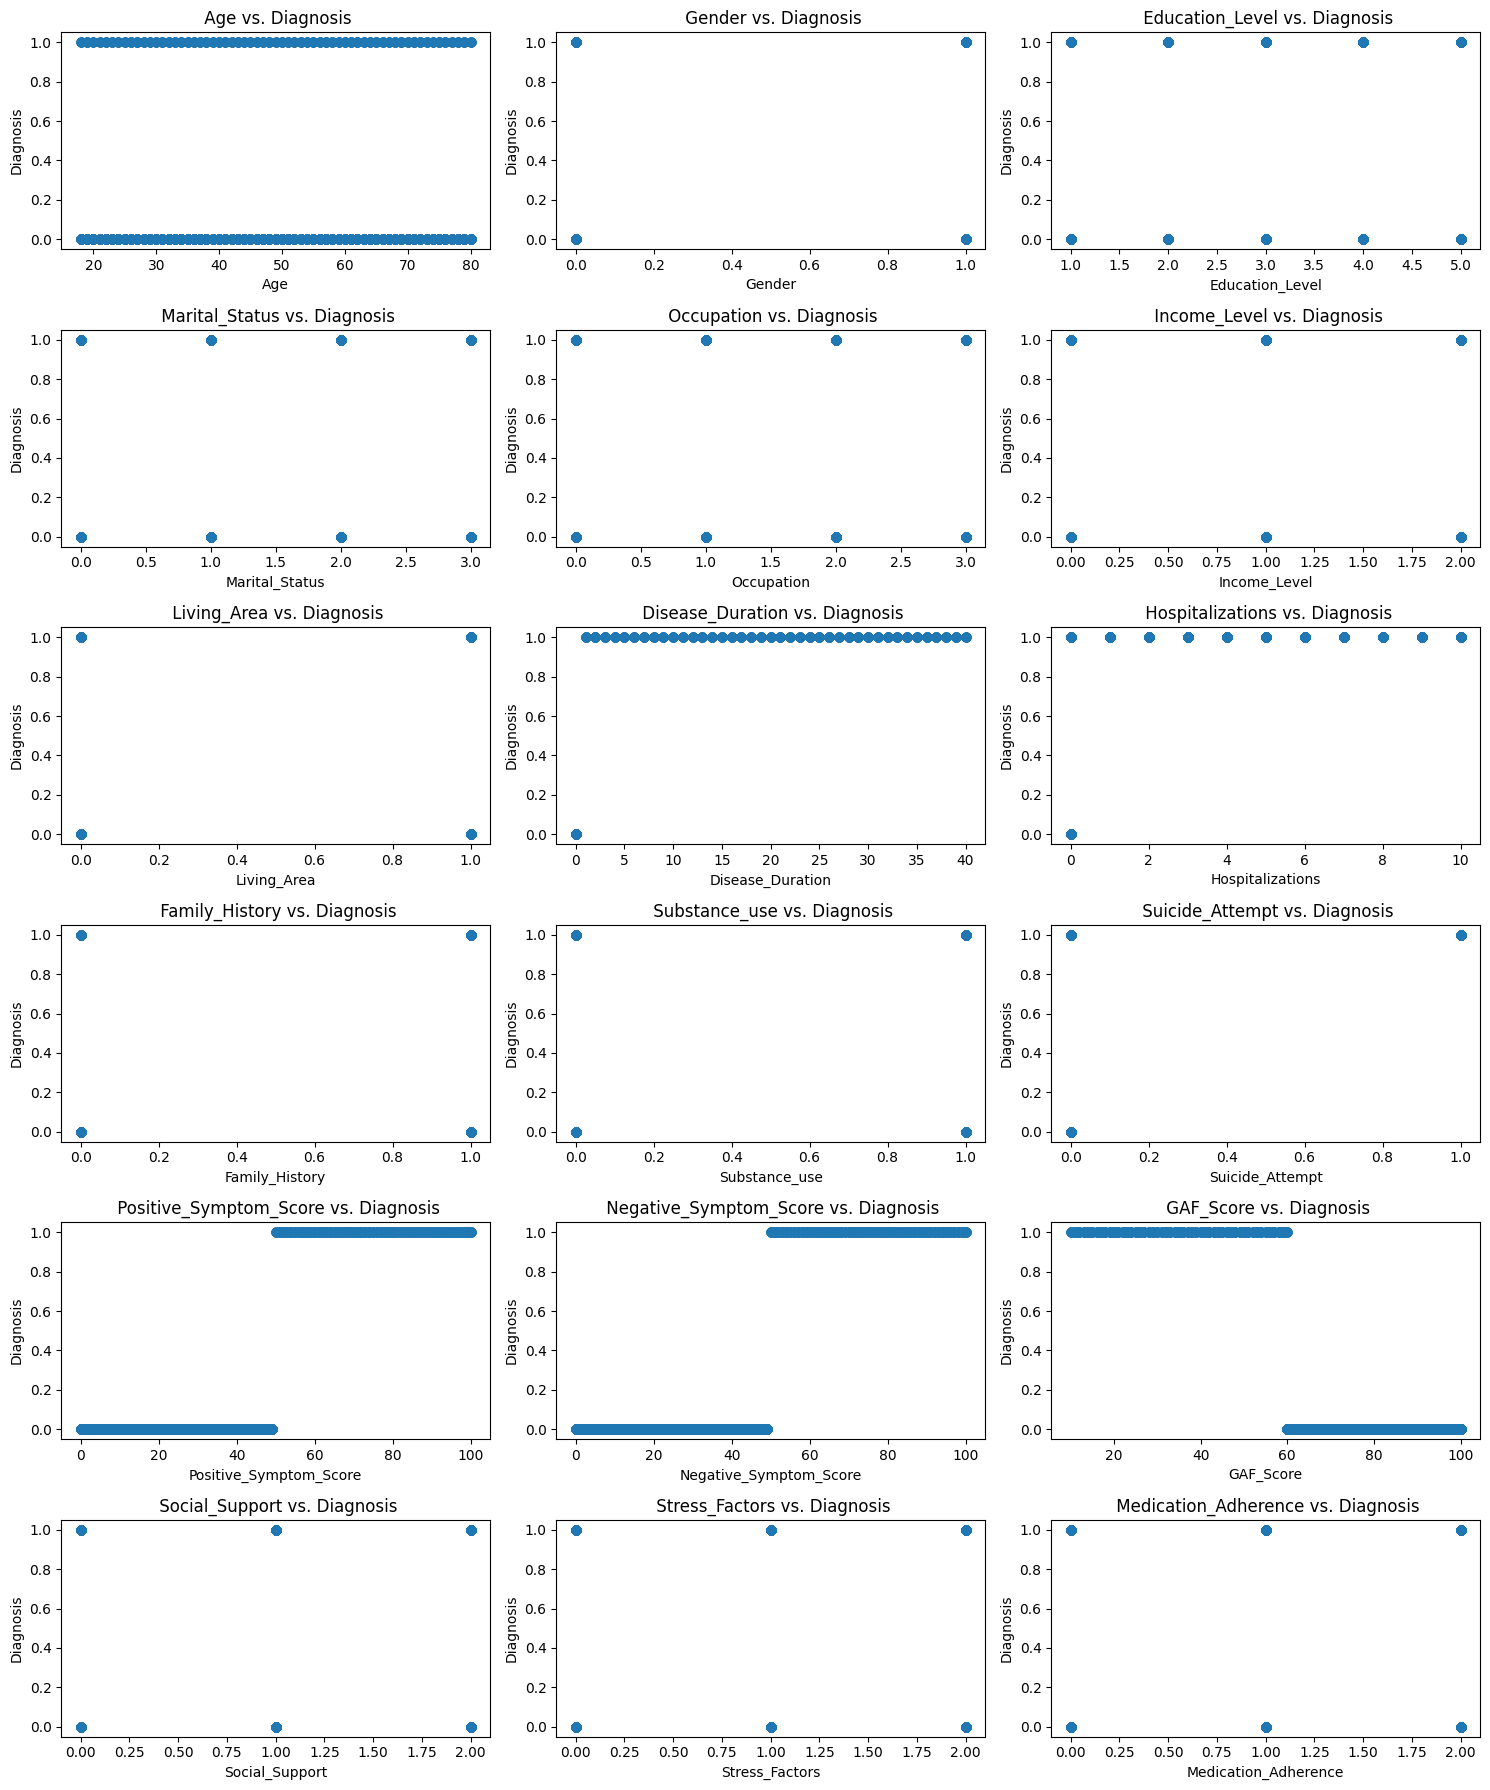

In [41]:
import matplotlib.pyplot as plt

# Number of features (columns in X)
num_features = X.shape[1]

# Set up a figure with subplots: choose the number of rows and columns
# You can use math to figure out how many rows/columns you need.
# For example, here we'll make a grid of 6 rows and 3 columns (6 * 3 = 18 plots)
rows = 6
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 18))  # Adjust the figsize to make the plots readable
axes = axes.ravel()  # Flatten the 2D array of axes to make indexing easier

# Loop through each feature and plot it against y
for i in range(num_features):
    ax = axes[i]  # Select the axis for the current plot
    ax.scatter(X.iloc[:, i], y)  # Scatter plot of the feature vs. y
    ax.set_xlabel(X.columns[i])  # Label for x-axis
    ax.set_ylabel('Diagnosis')  # Label for y-axis
    ax.set_title(f' {X.columns[i]} vs. Diagnosis')  # Title for the plot

# Adjust layout to make sure plots are not overlapping
plt.tight_layout()
plt.show()


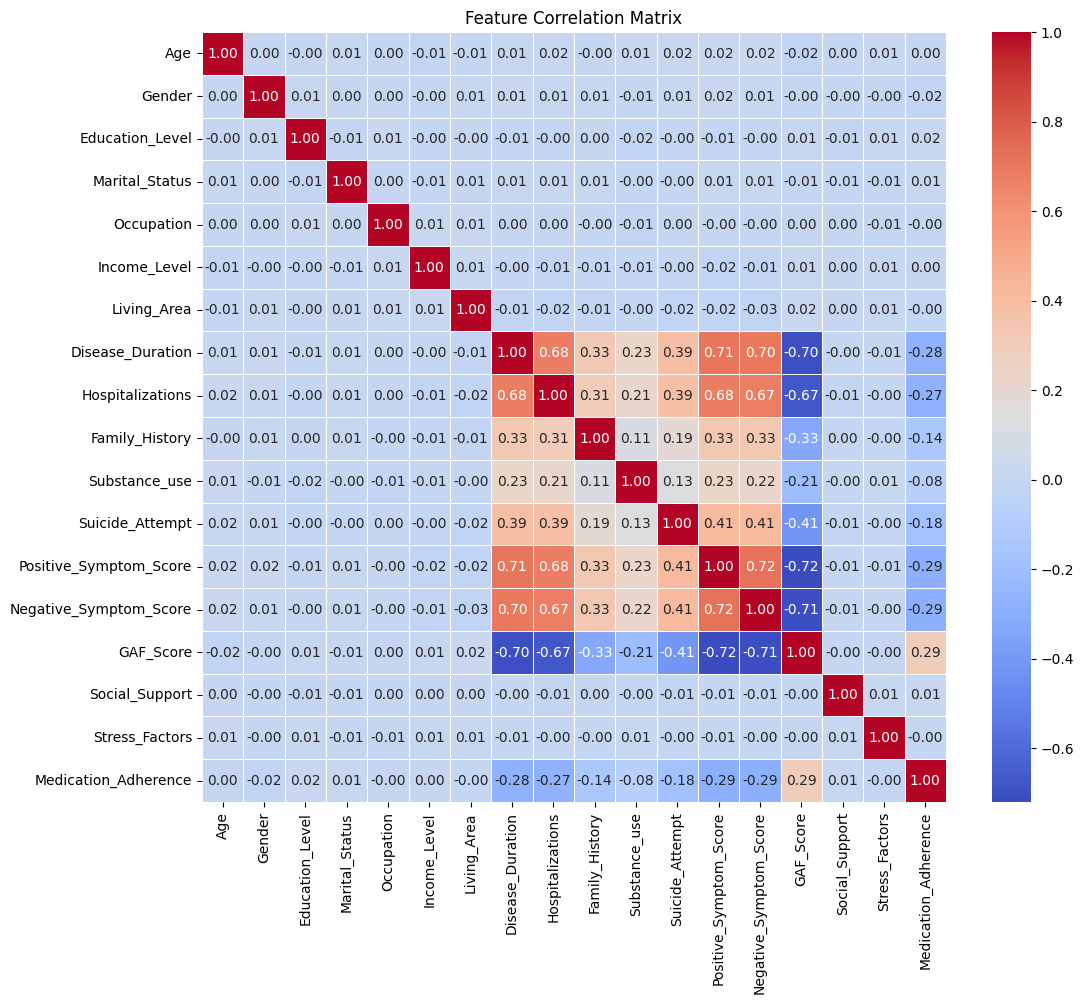

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = pd.DataFrame(X).corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

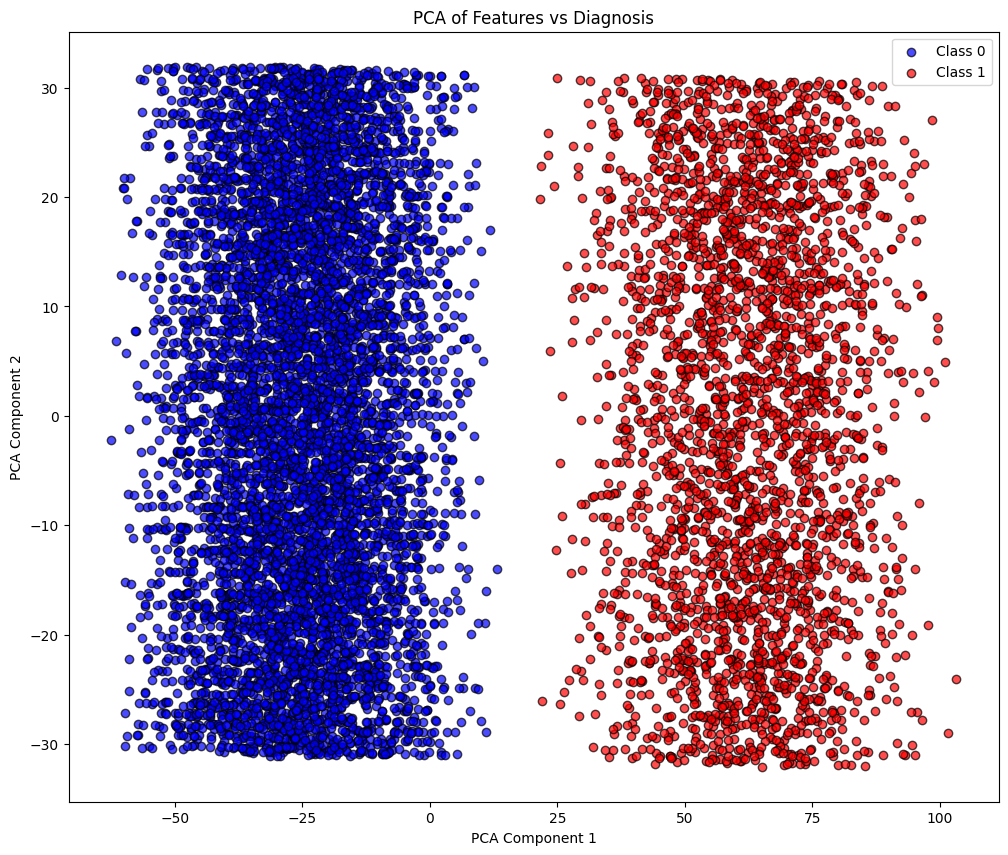

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce the 18 features to 2 components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Identify unique classes in y
unique_classes = np.unique(y)
colors = ['blue', 'red']  # Define colors for each class

plt.figure(figsize=(12, 10))

# Scatter plot for each class
for class_label, color in zip(unique_classes, colors):
    plt.scatter(X_reduced[y == class_label, 0],
                X_reduced[y == class_label, 1],
                label=f'Class {class_label}',
                color=color,
                edgecolors='k',
                alpha=0.7)

# Titles and labels
plt.title('PCA of Features vs Diagnosis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add legend
plt.legend()

# Show plot
plt.show()